In [1]:
# імпорт базових модулей
import matplotlib.pyplot as plt

# вимикаємо зайві попередження
import warnings
warnings.filterwarnings("ignore")

# друк всіх результатів в одній комірці а не тільки останнього
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# магічний метод для того щоб отримувати графіки біля комірок з кодом
%matplotlib inline

In [2]:
# імпорт додаткових модулей
import timeit
import tabulate
import random

In [3]:
def deterministic_quick_sort(arr):
	# Якщо масив має менше ніж два елементи, він уже відсортований
    if len(arr) <= 1:
        return arr
    
    # Вибираємо індекс для опорного елемента посередині масиву
    pivot = arr[len(arr) // 2]
    
	# Розділяємо масив на частини
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    # Рекурсивно сортуємо ліву і праву частини, а потім об'єднуємо
    return deterministic_quick_sort(left) + middle + deterministic_quick_sort(right)

# Приклад використання
arr = [3, 6, 8, 10, 1, 2, 1]
sorted_arr = deterministic_quick_sort(arr)
print("Відсортований масив:", sorted_arr)

Відсортований масив: [1, 1, 2, 3, 6, 8, 10]


In [4]:
def randomized_quick_sort(arr):
    # Якщо масив має менше ніж два елементи, він уже відсортований
    if len(arr) <= 1:
        return arr

    # Вибираємо випадковий індекс для опорного елемента
    pivot_index = random.randint(0, len(arr) - 1)
    pivot = arr[pivot_index]

    # Розділяємо масив на частини
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    # Рекурсивно сортуємо ліву і праву частини, а потім об'єднуємо
    return randomized_quick_sort(left) + middle + randomized_quick_sort(right)

# Приклад використання
arr = [3, 6, 8, 10, 1, 2, 1]
sorted_arr = deterministic_quick_sort(arr)
print("Відсортований масив:", sorted_arr)

Відсортований масив: [1, 1, 2, 3, 6, 8, 10]


In [5]:
# створення масивів для тестування
arr_dict = {}
for i in [10_000, 50_000, 100_000, 500_000,]:
	arr_dict[i] = [random.randint(0, 500_000) for _ in range(i)]

In [6]:
rounds = 5

deterministic_sort_times = []
randomized_sort_times = []
for k in arr_dict.keys():

	# Час для deterministic sort
	deterministic_time = timeit.timeit(lambda: deterministic_quick_sort(arr_dict[k]), number=rounds)
	deterministic_sort_times.append(deterministic_time / rounds)

	# Час для randomized sort
	randomized_time = timeit.timeit(lambda: randomized_quick_sort(arr_dict[k]), number=rounds)
	randomized_sort_times.append(randomized_time / rounds)

	# Вивід результатів у вигляді таблиці
	print(f"Розмір масиву: {k:<10}")
	print(f"Детермінований QuickSort: {(deterministic_time / rounds):<8.4f} секунд")
	print(f"Рандомізований QuickSort: {(randomized_time / rounds):<8.4f} секунд")
	print("-" * 50)


Розмір масиву: 10000     
Детермінований QuickSort: 0.0228   секунд
Рандомізований QuickSort: 0.0263   секунд
--------------------------------------------------
Розмір масиву: 50000     
Детермінований QuickSort: 0.1308   секунд
Рандомізований QuickSort: 0.1509   секунд
--------------------------------------------------
Розмір масиву: 100000    
Детермінований QuickSort: 0.2858   секунд
Рандомізований QuickSort: 0.3276   секунд
--------------------------------------------------
Розмір масиву: 500000    
Детермінований QuickSort: 1.4782   секунд
Рандомізований QuickSort: 1.4331   секунд
--------------------------------------------------


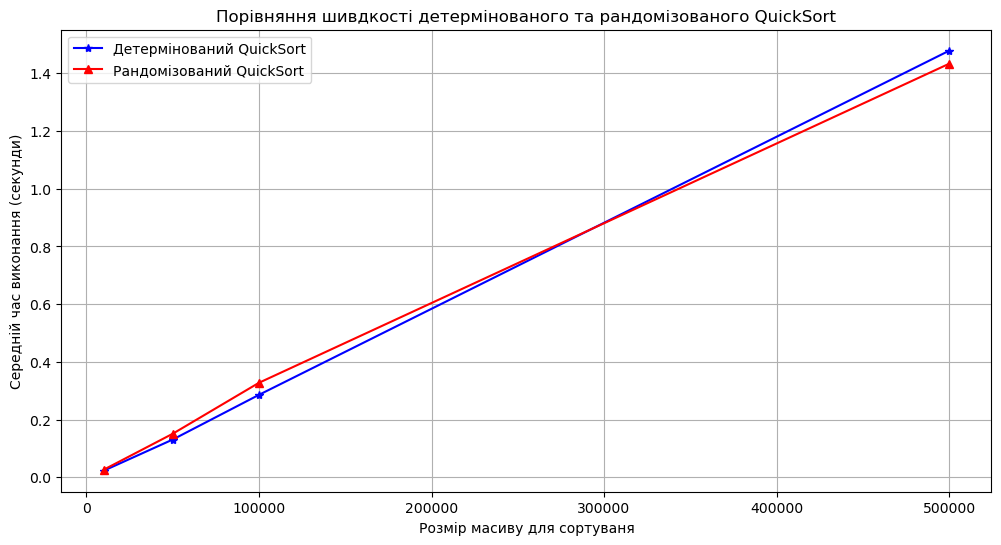

In [9]:
# малюємо графік порівняння часу виконання

# Створюємо дані для осі X
X = list(arr_dict.keys())

# Створюємо дані для осі Y
Y1 = deterministic_sort_times
Y2 = randomized_sort_times

# Створюємо фігуру
plt.figure(figsize=(12, 6))

# Малюємо першу лінію
plt.plot(X, Y1, label="Детермінований QuickSort", color="blue", marker='*', linestyle='-',)

# Малюємо другу лінію
plt.plot(X, Y2, label="Рандомізований QuickSort", color="red", marker='^', linestyle='-',)

# Додаємо заголовок та підписи осей
plt.title("Порівняння шивдкості детермінованого та рандомізованого QuickSort")
plt.xlabel("Розмір масиву для сортуваня")
plt.ylabel("Середній час виконання (секунди)")

# Додаємо легенду, щоб позначити лінії
plt.legend()

# Відображаємо сітку
plt.grid(True)

# Показуємо графік
plt.show();

In [10]:
# створюємо таблицю з результатами

# Створюємо заголовки для таблиці
headers = ["Розмір масиву", "Детермінований QuickSort (s)", "Рандомізований QuickSort (s)"]

# Створюємо таблицю з даними
table_data = []
for i in range(len(X)):
    table_data.append((X[i], f"{Y1[i]:.4f}", f"{Y2[i]:.4f}"))
    
# Виводимо таблицю
print(tabulate.tabulate(table_data, headers=headers, 
                        # tablefmt="grid"
                        ))

  Розмір масиву    Детермінований QuickSort (s)    Рандомізований QuickSort (s)
---------------  ------------------------------  ------------------------------
          10000                          0.0228                          0.0263
          50000                          0.1308                          0.1509
         100000                          0.2858                          0.3276
         500000                          1.4782                          1.4331


Висновки:
---------
На невеликих масивах більш швидким показав себе детермінований QuickSort, а на великих масивах - рандомізований QuickSort.

Випадковий вибір опорного елемента дозволяє уникнути ситуацій, коли вибір опорного елемента може бути невдалим для вже частково відсортованого масиву, що пришвидшує сортування цим алгоритмом.